In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix

In [3]:
data_dir = (r'D:\Rostock-Masters\Thesis\Test')
data_dir

'D:\\Rostock-Masters\\Thesis\\Test'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('D:/Rostock-Masters/Thesis/Test')

In [5]:
list(data_dir.glob('Device_4/*.csv'))[:6]

[WindowsPath('D:/Rostock-Masters/Thesis/Test/device_4/3_8_6_3_8_6-1.csv'),
 WindowsPath('D:/Rostock-Masters/Thesis/Test/device_4/3_8_6_3_8_6-10.csv'),
 WindowsPath('D:/Rostock-Masters/Thesis/Test/device_4/3_8_6_3_8_6-100.csv'),
 WindowsPath('D:/Rostock-Masters/Thesis/Test/device_4/3_8_6_3_8_6-101.csv'),
 WindowsPath('D:/Rostock-Masters/Thesis/Test/device_4/3_8_6_3_8_6-11.csv'),
 WindowsPath('D:/Rostock-Masters/Thesis/Test/device_4/3_8_6_3_8_6-12.csv')]

In [6]:
files_count_1 = list(data_dir.glob('Device_5/*.csv'))
len(files_count_1)

100

In [7]:
file_name_dict = {
    'Device_1' : list(data_dir.glob('Device_1/*.csv')),
    'Device_2' : list(data_dir.glob('Device_2/*.csv')),
    'Device_3' : list(data_dir.glob('Device_3/*.csv')),
    'Device_4' : list(data_dir.glob('Device_4/*.csv')),
    'Device_5' : list(data_dir.glob('Device_5/*.csv')),
    'Device_6' : list(data_dir.glob('Device_6/*.csv'))
}

In [8]:
file_label_dict = {
    'Device_1' : 0,
    'Device_2' : 1,
    'Device_3' : 2,
    'Device_4' : 3,
    'Device_5' : 4,
    'Device_6' : 5,
}

In [9]:
file_label_dict['Device_6']

5

In [10]:
len(file_name_dict['Device_5'])

100

In [11]:
str(file_name_dict['Device_3'][0])

'D:\\Rostock-Masters\\Thesis\\Test\\device_3\\3_8_5_3_8_5-1.csv'

### Classification

In [12]:
file_name_dict_2 = {
    'Device_1' : list(data_dir.glob('Device_1/*.csv')),
    'Device_2' : list(data_dir.glob('Device_2/*.csv'))
}

In [13]:
file_label_dict_2 = {
    'Device_1' : 0,
    'Device_2' : 1
}

In [14]:
df= pd.read_csv('3_8_1_3_8_1-1.csv')
df.columns = ['time', 'voltage']
df.head()

,time,voltage
0,0.0,32.965541
1,0.5,32.914965
2,1.0,32.904850
3,1.5,32.864389
4,2.0,32.854273


In [15]:
df['MA'] = df['voltage'].rolling(10,min_periods=0).mean()
df.head()

,time,voltage,MA
0,0.0,32.965541,32.965541
1,0.5,32.914965,32.940253
2,1.0,32.904850,32.928452
3,1.5,32.864389,32.912436
4,2.0,32.854273,32.900804


In [18]:
data_dir_s = ('sample')
data_dir_s = pathlib.Path(data_dir_s)
data_dir_s

WindowsPath('sample')

In [19]:
sample_file= list(data_dir_s.glob('*.csv'))
for file in sample_file:
    print(file)

sample\D1-3_8_1_3_8_1-10.csv
sample\D2-3_8_2_3_8_2-8.csv
sample\D3-3_8_5_3_8_5-9.csv
sample\D4-3_8_6_3_8_6-16.csv
sample\D5-3_8_7_3_8_7-15.csv
sample\D6-3_8_8_3_8_8-22.csv


In [20]:
sample_file[1]

WindowsPath('sample/D2-3_8_2_3_8_2-8.csv')

In [21]:

s_file_df_list= []
s_file_df_diff_list= []

s_file_df2_list =[]
s_file_df_diff2_list =[]
for s_file in sample_file:
    s_file_df= pd.read_csv(str(s_file))
    s_file_df.columns= ['time', 'voltage']
    s_file_df_list.append(s_file_df)
    s_file_df_diff= s_file_df['voltage'].diff()
    s_file_df_diff_list.append(s_file_df_diff)
    
    s_file_df2 = s_file_df.copy()
    s_file_df2['MA'] = s_file_df2['voltage'].rolling(10,min_periods=0).mean()# moving average
    s_file_df2= s_file_df2.drop('voltage',axis=1)
    s_file_df2.rename(columns={'MA':'voltage'},inplace=True)
    s_file_df2_list.append(s_file_df2)
    s_file_df2_diff_2 = s_file_df2['voltage'].diff()
    s_file_df_diff2_list.append(s_file_df2_diff_2)

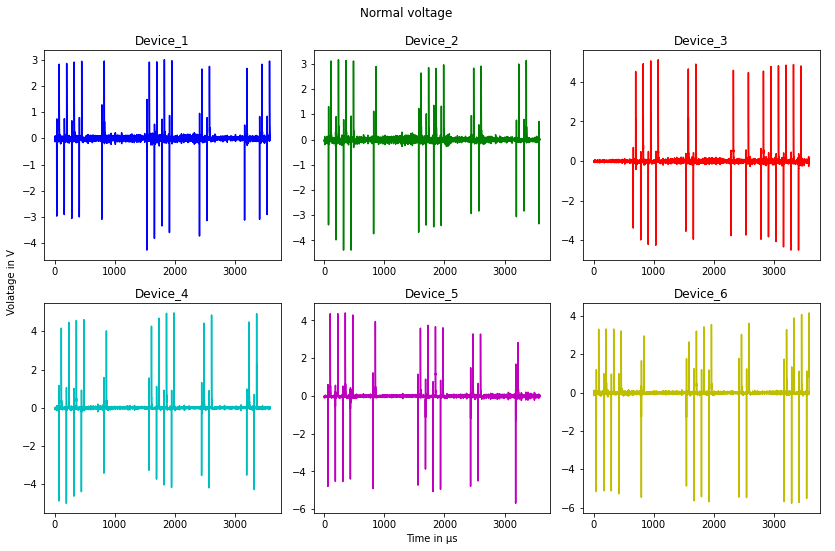

In [22]:
fig, axs = plt.subplots(2,3, figsize=(12,8)) #(1,2) for horizontal plot
fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
fig.suptitle('Normal voltage')
axs[0,0].plot(s_file_df_list[0]['time'], s_file_df_diff_list[0],'b')
axs[0,1].plot(s_file_df_list[1]['time'], s_file_df_diff_list[1],'g')
axs[0,2].plot(s_file_df_list[2]['time'], s_file_df_diff_list[2],'r')
axs[1,0].plot(s_file_df_list[3]['time'], s_file_df_diff_list[3],'c')
axs[1,1].plot(s_file_df_list[4]['time'], s_file_df_diff_list[4],'m')
axs[1,2].plot(s_file_df_list[5]['time'], s_file_df_diff_list[5],'y')

axs[0,0].set_title('Device_1')
axs[0,1].set_title('Device_2')
axs[0,2].set_title('Device_3')
axs[1,0].set_title('Device_4')
axs[1,1].set_title('Device_5')
axs[1,2].set_title('Device_6')
plt.xlabel('Time in μs')
plt.ylabel('Volatage in V')

plt.tight_layout ()

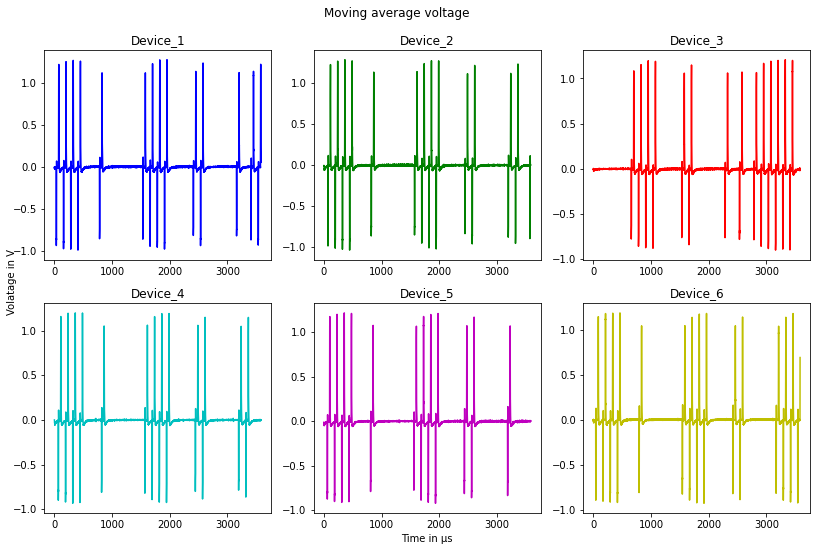

In [23]:
fig, axs = plt.subplots(2,3, figsize=(12,8)) #(1,2) for horizontal plot
fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
fig.suptitle('Moving average voltage')
axs[0,0].plot(s_file_df2_list[0]['time'], s_file_df_diff2_list[0],'b')
axs[0,1].plot(s_file_df2_list[1]['time'], s_file_df_diff2_list[1],'g')
axs[0,2].plot(s_file_df2_list[2]['time'], s_file_df_diff2_list[2],'r')
axs[1,0].plot(s_file_df2_list[3]['time'], s_file_df_diff2_list[3],'c')
axs[1,1].plot(s_file_df2_list[4]['time'], s_file_df_diff2_list[4],'m')
axs[1,2].plot(s_file_df2_list[5]['time'], s_file_df_diff2_list[5],'y')

axs[0,0].set_title('Device_1')
axs[0,1].set_title('Device_2')
axs[0,2].set_title('Device_3')
axs[1,0].set_title('Device_4')
axs[1,1].set_title('Device_5')
axs[1,2].set_title('Device_6')

plt.xlabel('Time in μs')
plt.ylabel('Volatage in V')
# fig.savefig('MA_voltage_6_device.png')
plt.tight_layout ()

In [24]:

df_lst_500 = []   #uncompressed
for device_name, folder in file_name_dict.items():
    for csv_file in folder:
        csv_file_df = pd.read_csv(str(csv_file))
        csv_file_df.columns = ['time', 'voltage']
        csv_file_df['MA'] = csv_file_df['voltage'].rolling(10,min_periods=0).mean()# moving average
        csv_file_df= csv_file_df.drop('voltage',axis=1)
        csv_file_df.rename(columns={'MA':'voltage'},inplace=True)

        threshold = csv_file_df['voltage'].diff().gt(1)
        group = (threshold&~threshold.shift(fill_value=False)).cumsum().add(1)
        time= lambda i: i['time'].groupby(group).apply(lambda j: j- j.iloc[0])
        df_2 = (csv_file_df.assign(bit=group,time=time).pivot(index='bit', columns='time', values='voltage'))

        df_3 = df_2.copy()
        df_3.reset_index(drop=True, inplace=True)
        df_3 = df_3.rename_axis(None, axis=1)
        df_3= df_3.fillna(method='pad')# fill values
        df_lst_500.append(df_3)



df_lst_500_describe = []
max_voltage_list = []
for j in range(len(df_lst_500)):
    desc = df_lst_500[j].apply(pd.DataFrame.describe, axis= 1)
    df_lst_500_describe.append(desc)

    max_voltage= df_lst_500[j].stack().max()
    max_voltage_list.append(max_voltage)
    
###########

bits_count_list = []
min_value_count_list = []
max_value_count_list = []
for k in range(len(df_lst_500_describe)):
    min_cols = df_lst_500_describe[k]['count'].min()
    print (f'{k+1}: ','Min count',min_cols)

    min_value_count_list.append(min_cols)

    max_cols = df_lst_500_describe[k]['count'].max()
    max_value_count_list.append(max_cols)

    index_min_count = df_lst_500[k].apply(pd.DataFrame.describe, axis= 1)['count'].idxmin()+1 # index number which has less values
    maximum_bits = df_lst_500_describe[k]['count'].last_valid_index()+1 #Max bits found in one measurement/csv file

    if maximum_bits<10:
        print('*******File Number: ',f'{k+1}: ', 'bits', maximum_bits,'********////////')
    bits_count_list.append(maximum_bits)

    if min_cols<50: # and index_min_count<14
        print('-----Idx num containing least count----- :',index_min_count)

#     print('')
#     print('Max Voltage value among all measurements: ', max(max_voltage_list))
#     print('')     
#     print('Number of minimum bits/waveform :', min(bits_count_list))
#     print('Number of maximum bits/waveform :', max(bits_count_list))
#     print('')
#     print('Min count of voltage values in a bit:', min(min_value_count_list))
#     print('Max count of voltage value in a bit:', max(max_value_count_list))

1:  Min count 210.0
2:  Min count 150.0
3:  Min count 206.0
4:  Min count 647.0
5:  Min count 183.0
6:  Min count 225.0
7:  Min count 647.0
8:  Min count 171.0
9:  Min count 227.0
10:  Min count 208.0
11:  Min count 230.0
12:  Min count 186.0
13:  Min count 162.0
14:  Min count 149.0
15:  Min count 221.0
16:  Min count 217.0
17:  Min count 143.0
18:  Min count 221.0
19:  Min count 172.0
20:  Min count 198.0
21:  Min count 179.0
22:  Min count 224.0
23:  Min count 1403.0
24:  Min count 204.0
25:  Min count 195.0
26:  Min count 161.0
27:  Min count 171.0
28:  Min count 183.0
29:  Min count 150.0
30:  Min count 224.0
31:  Min count 644.0
32:  Min count 166.0
33:  Min count 191.0
34:  Min count 144.0
35:  Min count 226.0
36:  Min count 226.0
37:  Min count 177.0
38:  Min count 187.0
39:  Min count 151.0
40:  Min count 193.0
41:  Min count 646.0
42:  Min count 172.0
43:  Min count 226.0
44:  Min count 175.0
45:  Min count 167.0
46:  Min count 149.0
47:  Min count 179.0
48:  Min count 204.0


384:  Min count 227.0
385:  Min count 203.0
386:  Min count 646.0
387:  Min count 209.0
388:  Min count 184.0
389:  Min count 167.0
390:  Min count 228.0
391:  Min count 166.0
392:  Min count 233.0
393:  Min count 1404.0
394:  Min count 194.0
395:  Min count 181.0
396:  Min count 152.0
397:  Min count 173.0
398:  Min count 169.0
399:  Min count 164.0
400:  Min count 201.0
401:  Min count 227.0
402:  Min count 225.0
403:  Min count 219.0
404:  Min count 651.0
405:  Min count 148.0
406:  Min count 195.0
407:  Min count 210.0
408:  Min count 203.0
409:  Min count 230.0
410:  Min count 211.0
411:  Min count 226.0
412:  Min count 181.0
413:  Min count 167.0
414:  Min count 218.0
415:  Min count 234.0
416:  Min count 152.0
417:  Min count 186.0
418:  Min count 147.0
419:  Min count 176.0
420:  Min count 231.0
421:  Min count 177.0
422:  Min count 148.0
423:  Min count 211.0
424:  Min count 177.0
425:  Min count 1406.0
426:  Min count 195.0
427:  Min count 168.0
428:  Min count 168.0
429:  Mi

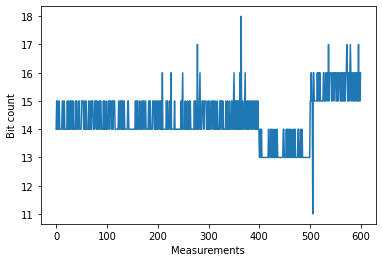

In [25]:
plt.plot(bits_count_list)
plt.xlabel('Measurements')
plt.ylabel('Bit count')
plt.savefig('bit_count_6_device.png')
plt.show()

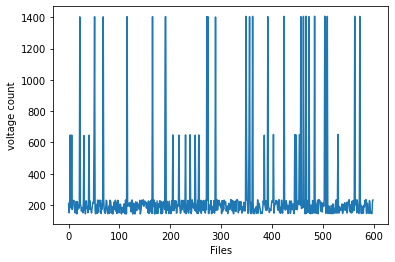

In [26]:
plt.plot(min_value_count_list)
plt.xlabel('Files')
plt.ylabel('voltage count')
plt.show()

In [27]:
im_df = pd.read_csv('compressed/Device_3/3_8_5_3_8_5-45.csv', index_col= None)
im_df = im_df.iloc[:,1:]
im_df

,0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,...,45.0,45.5,46.0,46.5,47.0,47.5,48.0,48.5,49.0,49.5
0,32.864389,32.834043,32.803697,32.753121,32.732891,32.651969,32.641854,32.550817,32.530586,32.439549,...,30.113046,30.092815,30.072585,30.082700,30.062469,30.062469,30.042239,30.042239,30.011893,29.991663
1,26.512023,27.432509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,29.748897,30.365926,31.043647,31.923672,32.439549,32.682315,33.086924,33.319574,33.521879,33.734299,...,31.367334,31.377450,31.306643,31.306643,31.316758,31.195375,31.245952,31.175145,31.144799,31.134684
3,26.653636,27.634814,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,29.951202,30.608692,31.428026,32.368742,32.712660,32.975656,33.430842,33.623031,33.835451,34.037756,...,31.529178,31.559524,31.498832,31.478602,31.438141,31.397680,31.377450,31.336989,31.296528,31.306643
5,26.552484,27.655044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,29.971432,30.649153,31.367334,32.318166,32.540701,33.279113,33.380266,33.774760,33.906258,34.219830,...,31.589870,31.569639,31.549409,31.498832,31.488717,31.448256,31.417911,31.397680,31.367334,31.347104
7,26.633406,27.705620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,30.042239,30.628922,31.488717,32.378858,33.006002,33.157730,33.531994,33.744414,33.956834,34.189484,...,31.660676,31.579754,31.529178,31.539293,31.508948,31.458371,31.438141,31.417911,31.387565,31.357219
9,26.198451,27.007669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
im_df2 = im_df.copy()
im_df2= im_df2.fillna(method='ffill')
im_df2

,0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,...,45.0,45.5,46.0,46.5,47.0,47.5,48.0,48.5,49.0,49.5
0,32.864389,32.834043,32.803697,32.753121,32.732891,32.651969,32.641854,32.550817,32.530586,32.439549,...,30.113046,30.092815,30.072585,30.082700,30.062469,30.062469,30.042239,30.042239,30.011893,29.991663
1,26.512023,27.432509,32.803697,32.753121,32.732891,32.651969,32.641854,32.550817,32.530586,32.439549,...,30.113046,30.092815,30.072585,30.082700,30.062469,30.062469,30.042239,30.042239,30.011893,29.991663
2,29.748897,30.365926,31.043647,31.923672,32.439549,32.682315,33.086924,33.319574,33.521879,33.734299,...,31.367334,31.377450,31.306643,31.306643,31.316758,31.195375,31.245952,31.175145,31.144799,31.134684
3,26.653636,27.634814,31.043647,31.923672,32.439549,32.682315,33.086924,33.319574,33.521879,33.734299,...,31.367334,31.377450,31.306643,31.306643,31.316758,31.195375,31.245952,31.175145,31.144799,31.134684
4,29.951202,30.608692,31.428026,32.368742,32.712660,32.975656,33.430842,33.623031,33.835451,34.037756,...,31.529178,31.559524,31.498832,31.478602,31.438141,31.397680,31.377450,31.336989,31.296528,31.306643
5,26.552484,27.655044,31.428026,32.368742,32.712660,32.975656,33.430842,33.623031,33.835451,34.037756,...,31.529178,31.559524,31.498832,31.478602,31.438141,31.397680,31.377450,31.336989,31.296528,31.306643
6,29.971432,30.649153,31.367334,32.318166,32.540701,33.279113,33.380266,33.774760,33.906258,34.219830,...,31.589870,31.569639,31.549409,31.498832,31.488717,31.448256,31.417911,31.397680,31.367334,31.347104
7,26.633406,27.705620,31.367334,32.318166,32.540701,33.279113,33.380266,33.774760,33.906258,34.219830,...,31.589870,31.569639,31.549409,31.498832,31.488717,31.448256,31.417911,31.397680,31.367334,31.347104
8,30.042239,30.628922,31.488717,32.378858,33.006002,33.157730,33.531994,33.744414,33.956834,34.189484,...,31.660676,31.579754,31.529178,31.539293,31.508948,31.458371,31.438141,31.417911,31.387565,31.357219
9,26.198451,27.007669,31.488717,32.378858,33.006002,33.157730,33.531994,33.744414,33.956834,34.189484,...,31.660676,31.579754,31.529178,31.539293,31.508948,31.458371,31.438141,31.417911,31.387565,31.357219


### Preprocessing

In [29]:
# Pre processing for CNN
device_list, device_label = [],[]   #compressed

for device_name, folder in file_name_dict_2.items():
    for file in folder:
        file_df = pd.read_csv(str(file))
        file_df.columns = ['time', 'voltage']
        file_df['MA'] = file_df['voltage'].rolling(10,min_periods=0).mean()# moving average
        file_df= file_df.drop('voltage',axis=1)
        file_df.rename(columns={'MA':'voltage'},inplace=True)

        threshold = file_df['voltage'].diff().gt(1)
        group = (threshold&~threshold.shift(fill_value=False)).cumsum().add(1)
        time= lambda i: i['time'].groupby(group).apply(lambda j: j- j.iloc[0])
        df_2 = (file_df.assign(bit=group,time=time).pivot(index='bit', columns='time', values='voltage'))

        df_3 = df_2.copy()
        df_3.reset_index(drop=True, inplace=True)
        df_3 = df_3.rename_axis(None, axis=1)

        #Compressing to  14 rows 100 columns
        df_4=df_3.iloc[:14, :100] #iloc = location, loc=label # 14 rows, 100 columns
#         df_4= df_4.fillna(method='pad')
        device_list.append(df_4)
        device_label.append(file_label_dict_2[device_name])
    

In [67]:
device_list[145]

,0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,...,45.0,45.5,46.0,46.5,47.0,47.5,48.0,48.5,49.0,49.5
0,33.855681,33.820278,33.808477,33.797519,33.774760,33.752843,33.728519,33.703953,33.676979,33.646296,...,30.520689,30.500459,30.481240,30.462021,30.444825,30.426618,30.408410,30.392226,30.376042,30.359857
1,24.994738,26.087183,27.252458,28.447067,29.682137,30.823135,31.669780,32.302993,32.795605,33.169869,...,31.658653,31.631342,31.599985,31.565593,31.539293,31.508948,31.479613,31.452302,31.421957,31.396669
2,25.127248,26.237900,27.421382,28.649372,29.923891,31.089166,31.969191,32.613531,33.103108,33.491533,...,31.868038,31.833647,31.802289,31.767898,31.734517,31.702149,31.668768,31.635388,31.600996,31.568628
3,24.106621,25.176812,26.311741,27.541754,28.773789,30.053366,31.215606,32.092597,32.736937,33.242698,...,31.957052,31.921649,31.886246,31.849831,31.817462,31.784082,31.753736,31.724402,31.691022,31.663711
4,25.219296,26.409859,27.589295,28.834480,30.114057,31.272251,32.142161,32.779421,33.266975,33.657423,...,31.940868,31.910522,31.877142,31.840727,31.808359,31.778013,31.742610,31.712264,31.676861,31.643480
5,26.059872,27.152317,28.258924,29.402956,30.383122,31.094223,31.636400,32.057193,32.383915,32.679280,...,31.095235,31.067924,31.036566,31.008244,30.982956,30.954633,30.926310,30.901022,30.873711,30.849435
6,26.285442,27.395083,28.512816,29.646733,30.561150,31.229767,31.748679,32.151265,32.464837,32.761213,...,31.065900,31.040612,31.007232,30.980933,30.950587,30.923276,30.895965,30.867642,30.844377,30.814031
7,25.499488,26.586876,27.776427,28.980140,30.222290,31.221675,31.965145,32.523505,32.950368,33.299344,...,31.635388,31.603019,31.576720,31.543339,31.517040,31.484671,31.455337,31.419934,31.395657,31.361265
8,24.528426,25.594572,26.759846,27.960524,29.207732,30.471125,31.498832,32.258486,32.827974,33.257871,...,31.862981,31.826566,31.796220,31.761828,31.729460,31.696079,31.662699,31.635388,31.605042,31.573685
9,24.586083,25.679539,26.876171,28.110230,29.370588,30.639038,31.663711,32.423365,32.988806,33.426796,...,31.925695,31.891303,31.854889,31.824543,31.793186,31.763851,31.731483,31.694056,31.664722,31.628307


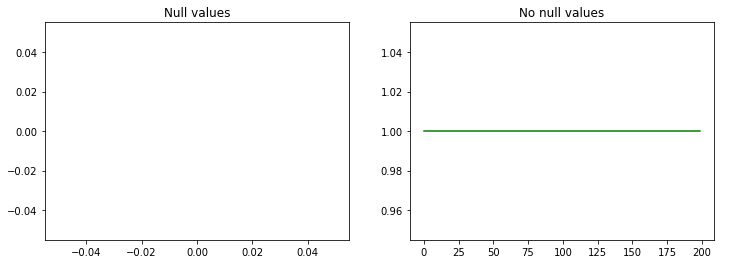

In [32]:
#Checking if there is any null values in the processed dataframe
null_list=[]
no_null_list=[]
for i in range(len(device_list)):
    null_status=device_list[i].isnull().any().any()
    if null_status:
        null_list.append(0)
#         print('File number: ',i+1)
    else:
        no_null_list.append(1)
#         print(i+1,'No null values')
fig, axs = plt.subplots(1,2, figsize=(12,4)) #(1,2) for horizontal plot
fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
# fig.suptitle('Moving average voltage')
axs[0].plot(null_list,'b')
axs[0].set_title('Null values')
axs[1].plot(no_null_list,'g')
axs[1].set_title('No null values')
plt.show()